In [1]:
# Improving the accuracy

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def EulerMethod(f, t0, tend, u, N):
    h = (tend-t0)/N
    t = np.linspace(t0, tend, N)
    result = []
    result.append(u)

    for k in range(1, N+1):
        k1 = f(t[k-1], u)     #One Eulerstep of size h
        k2 = f(t[k-1]+0.5*h, u + 0.5*h*k1)
        u =u + h*k2
        result.append(u)
    return h, np.array(t), np.array(result)

def f(t, u):
    eps = 1
    f = np.zeros(2)
    f[0] = u[1]
    f[1] = -eps * (u[0] ** 2 - 1) * u[1] - u[0]
    return f

In [3]:
t0 = 0.0
tend = 1
N = [4, 8, 16]
u = np.array([1.0, 0.0])
h, t, result = EulerMethod(f, t0, tend, u, 320)
y1 = result[-1][0]
u_N = []
step =[]
e = []
for k in range(0, len(N)):
    h, t, result = EulerMethod(f, t0, tend, u, N[k])
    u_N.append(result[-1][0])
    dif = (u_N[k]- y1)
    e.append(dif)
    step.append(h)


In [20]:
print("\n       N ", end="  ")
print("         h ", end=" ")
print("         u_1N", end="  ")
print("       u_1N-y(1)", end = " ")
print("\n  ____________________________________________________", end= " ")
print()
for i in range(0, len(N)):
    print("{:10d}".format(N[i]), end=" ")
    print("{:12.4f}".format(step[i]), end=" ")
    print("{:14.4f}".format(u_N[i]), end = " ")
    print("{:12.4f}".format(e[i]), end = " ")
    print()



       N            h           u_1N         u_1N-y(1) 
  ____________________________________________________ 
         4       0.2500         0.4989       0.0013 
         8       0.1250         0.4980       0.0004 
        16       0.0625         0.4977       0.0001 


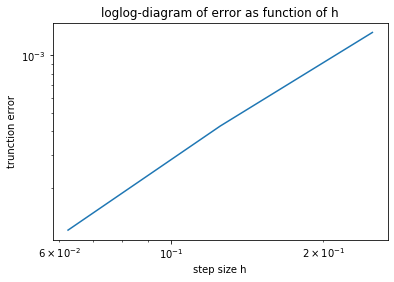

In [5]:
plt.loglog(step, e)
plt.xlabel('step size h')
plt.ylabel('trunction error')
plt.title('loglog-diagram of error as function of h')
plt.show()